In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mne
df = pd.read_csv("EEG.machinelearing_data_BRMH.csv")

In [2]:
chs = {'FP1': [-0.03, 0.08],
       'FP2': [0.03, 0.08],
       'F7': [-0.073, 0.047],
       'F3': [-0.04, 0.041],
       'Fz': [0, 0.038],
       'F4': [0.04, 0.041],
       'F8': [0.073, 0.047],
       'T3': [-0.085, 0],
       'C3': [-0.045, 0],
       'Cz': [0, 0],
       'C4': [0.045, 0],
       'T4': [0.085, 0],
       'T5': [-0.073, -0.047],
       'P3': [-0.04, -0.041],
       'Pz': [0, -0.038],
       'P4': [0.04, -0.041],
       'T6': [0.07, -0.047],
       'O1': [-0.03, -0.08],
       'O2': [0.03, -0.08]}
channels = pd.DataFrame(chs).transpose()
channels

,0,1
FP1,-0.030,0.080
FP2,0.030,0.080
F7,-0.073,0.047
F3,-0.040,0.041
Fz,0.000,0.038
F4,0.040,0.041
F8,0.073,0.047
T3,-0.085,0.000
C3,-0.045,0.000
Cz,0.000,0.000


In [3]:
for key in chs.keys():
    chs[key]+=[0]
chs

{'FP1': [-0.03, 0.08, 0],
 'FP2': [0.03, 0.08, 0],
 'F7': [-0.073, 0.047, 0],
 'F3': [-0.04, 0.041, 0],
 'Fz': [0, 0.038, 0],
 'F4': [0.04, 0.041, 0],
 'F8': [0.073, 0.047, 0],
 'T3': [-0.085, 0, 0],
 'C3': [-0.045, 0, 0],
 'Cz': [0, 0, 0],
 'C4': [0.045, 0, 0],
 'T4': [0.085, 0, 0],
 'T5': [-0.073, -0.047, 0],
 'P3': [-0.04, -0.041, 0],
 'Pz': [0, -0.038, 0],
 'P4': [0.04, -0.041, 0],
 'T6': [0.07, -0.047, 0],
 'O1': [-0.03, -0.08, 0],
 'O2': [0.03, -0.08, 0]}

C:\Users\DELL\AppData\Local\Temp\ipykernel_6996\2461572216.py:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mont.plot()


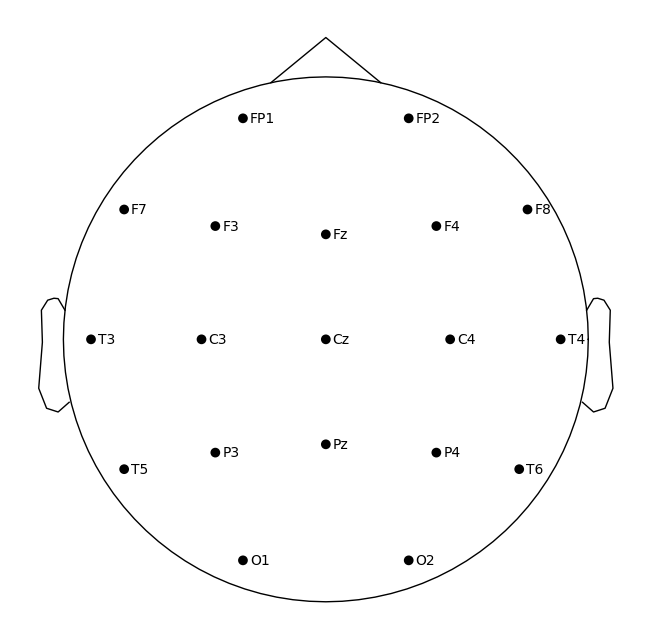

In [4]:
mont = mne.channels.make_dig_montage(chs)
mont.plot()
plt.show()

In [5]:
def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='Spectral_r', cb_pos=(0.9, 0.1),
             cb_width=0.04, cb_height=0.9, marker=None, marker_style=None, vmin=None, vmax=None, **kwargs):
    """
    Function visulises processed EEG data in a simple way. Based on mne.viz.plot_topomap.


    :param levels: numpy.array, shape (n_chan,)
        data values to plot.
    :param positions: numpy.array, shape (n_chan, 2)|instance of mne.Info
        Location information for the data points(/channels). If an array, for each data point,
        the x and y coordinates. If an Info object, it must contain only one data type and exactly
        len(data) data channels, and the x/y coordinates will be inferred from the montage applied
        to the Info object.
    :param axes: matplotlib.axes.Axes
        The axes to plot to.
    :param fig: matplotlib.figure.Figure
        The figure to create colorbar on.
    :param ch_names: list | None
        List of channel names. If None, channel names are not plotted.
    :param cmap: matplotlib colormap | None
        Colormap to use. If None, ‘Reds’ is used for all positive data, otherwise defaults to ‘RdBu_r’.
        Default value is 'Spectral_r'
    :param cb_pos: tuple/list of floats
        Coordinates of color bar
    :param cb_width: float
        Width of colorbar
    :param cb_height: float
        Height of colorbar
    :param marker: numpy.array of bool, shape (n_channels,) | None
        Array indicating channel(s) to highlight with a distinct plotting style.
        Array elements set to True will be plotted with the parameters given in mask_params.
        Defaults to None, equivalent to an array of all False elements.
    :param marker_style: dict | None
        Additional plotting parameters for plotting significant sensors. Default (None) equals:
        dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=4)
    :param vmin, vmax: float | callable() | None
        Lower and upper bounds of the colormap, in the same units as the data.
        If vmin and vmax are both None, they are set at ± the maximum absolute value
        of the data (yielding a colormap with midpoint at 0). If only one of vmin, vmax is None,
        will use min(data) or max(data), respectively. If callable, should accept a NumPy array
        of data and return a float.
    :param kwargs:
        any other parameter used in mne.viz.plot_topomap
    :return im: matplotlib.image.AxesImage
        The interpolated data.
    :return cn: matplotlib.contour.ContourSet
        The fieldlines.
    """
    if 'mask' not in kwargs:
        mask = np.ones(levels.shape[0], dtype='bool')
    else:
        mask = None
    im, cm = mne.viz.plot_topomap(levels, positions, axes=axes, names=ch_names, vmin=vmin, vmax=vmax,
                          cmap=cmap, mask=mask, mask_params=marker_style, show=False, **kwargs)

    cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
    clb = axes.figure.colorbar(im, cax=cbar_ax)
    return im, cm

In [6]:
mis = df.isna().sum()
sep_col = mis[mis == df.shape[0]].index[0]
df = df.loc[:, 'main.disorder':sep_col].drop(sep_col, axis=1)
df

,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,1.993727,1.765493,1.464281,1.501948,1.707307,1.553448,1.552658,1.388662,1.592717,1.806598
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,0.903383,0.931967,0.437117,0.930843,1.234874,1.373268,1.411808,1.140695,1.118041,3.162143
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,1.096713,1.691152,1.505663,1.133891,1.661768,1.403429,1.349457,1.270525,1.408471,1.454618
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,1.115040,1.122776,2.128138,1.648217,1.147666,1.049152,1.131654,1.415856,1.391048,1.527403
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,1.193191,2.320845,3.562820,1.441662,1.018804,1.274009,2.350806,2.307730,2.129431,3.766860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Healthy control,Healthy control,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,...,1.966436,1.763397,1.285942,2.437923,2.130979,1.727413,1.710518,2.574734,2.533354,5.596057
941,Healthy control,Healthy control,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,...,2.701922,2.685138,2.648595,2.559590,3.054965,3.163359,3.247100,2.646515,3.385173,3.085049
942,Healthy control,Healthy control,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,...,3.258838,2.434620,1.501337,0.840513,1.733498,1.610465,1.644675,1.216763,1.614421,1.164097
943,Healthy control,Healthy control,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,...,1.849005,1.678465,3.655796,1.429330,3.151128,1.630643,1.888551,1.447402,1.819110,1.302056


In [7]:
def reformat_name(name):
    '''
    reformat from XX.X.band.x.channel to band.channel
    '''
    _, _, band, _, channel = name.split(sep='.')
    return f'{band}.{channel}'

reformat_vect = np.vectorize(reformat_name)
new_colnames = np.concatenate((df.columns[:2],
                              reformat_vect(df.columns[2:])))
df.columns = new_colnames

print(df.columns)

Index(['main.disorder', 'specific.disorder', 'delta.FP1', 'delta.FP2',
       'delta.F7', 'delta.F3', 'delta.Fz', 'delta.F4', 'delta.F8', 'delta.T3',
       ...
       'gamma.Cz', 'gamma.C4', 'gamma.T4', 'gamma.T5', 'gamma.P3', 'gamma.Pz',
       'gamma.P4', 'gamma.T6', 'gamma.O1', 'gamma.O2'],
      dtype='object', length=116)


In [8]:
df

,main.disorder,specific.disorder,delta.FP1,delta.FP2,delta.F7,delta.F3,delta.Fz,delta.F4,delta.F8,delta.T3,...,gamma.Cz,gamma.C4,gamma.T4,gamma.T5,gamma.P3,gamma.Pz,gamma.P4,gamma.T6,gamma.O1,gamma.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,1.993727,1.765493,1.464281,1.501948,1.707307,1.553448,1.552658,1.388662,1.592717,1.806598
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,0.903383,0.931967,0.437117,0.930843,1.234874,1.373268,1.411808,1.140695,1.118041,3.162143
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,1.096713,1.691152,1.505663,1.133891,1.661768,1.403429,1.349457,1.270525,1.408471,1.454618
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,1.115040,1.122776,2.128138,1.648217,1.147666,1.049152,1.131654,1.415856,1.391048,1.527403
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,1.193191,2.320845,3.562820,1.441662,1.018804,1.274009,2.350806,2.307730,2.129431,3.766860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Healthy control,Healthy control,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,...,1.966436,1.763397,1.285942,2.437923,2.130979,1.727413,1.710518,2.574734,2.533354,5.596057
941,Healthy control,Healthy control,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,...,2.701922,2.685138,2.648595,2.559590,3.054965,3.163359,3.247100,2.646515,3.385173,3.085049
942,Healthy control,Healthy control,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,...,3.258838,2.434620,1.501337,0.840513,1.733498,1.610465,1.644675,1.216763,1.614421,1.164097
943,Healthy control,Healthy control,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,...,1.849005,1.678465,3.655796,1.429330,3.151128,1.630643,1.888551,1.447402,1.819110,1.302056


In [9]:
df['main.disorder'] = pd.Categorical(df['main.disorder'])


In [10]:
df['main.disorder'].dtype

CategoricalDtype(categories=['Addictive disorder', 'Anxiety disorder', 'Healthy control',
                  'Mood disorder', 'Obsessive compulsive disorder',
                  'Schizophrenia', 'Trauma and stress related disorder'],
, ordered=False, categories_dtype=object)

In [11]:
import pandas as pd

df['main.disorder'] = pd.Categorical(df['main.disorder'])

numeric_columns = df.select_dtypes(include='number').columns
main_mean = df.groupby('main.disorder')[numeric_columns].mean().reset_index()

bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']

main_mean = pd.wide_to_long(main_mean, bands, ['main.disorder'], 'channel', sep='.', suffix='\w+')

print(main_mean)


                                                delta      theta      alpha  \
main.disorder                      channel                                    
Addictive disorder                 FP1      18.831516  13.836983  24.308169   
Anxiety disorder                   FP1      20.212546  12.220164  20.542989   
Healthy control                    FP1      18.383673  11.877841  21.024037   
Mood disorder                      FP1      20.652163  13.594064  23.575915   
Obsessive compulsive disorder      FP1      18.261254  12.469764  24.380553   
...                                               ...        ...        ...   
Healthy control                    O2        9.597102   7.218941  20.192476   
Mood disorder                      O2       13.887099   9.051129  28.289462   
Obsessive compulsive disorder      O2       11.490165   9.438324  31.925618   
Schizophrenia                      O2       14.780898   9.635807  28.995409   
Trauma and stress related disorder O2       13.61917

C:\Users\DELL\AppData\Local\Temp\ipykernel_6996\1529629085.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  main_mean = df.groupby('main.disorder')[numeric_columns].mean().reset_index()


In [12]:
main_mean

,,delta,theta,alpha,beta,highbeta,gamma
main.disorder,channel,,,,,,
Addictive disorder,FP1,18.831516,13.836983,24.308169,10.588020,2.041568,2.418517
Anxiety disorder,FP1,20.212546,12.220164,20.542989,11.369194,2.362892,2.874982
Healthy control,FP1,18.383673,11.877841,21.024037,9.197048,2.055055,2.577345
Mood disorder,FP1,20.652163,13.594064,23.575915,12.357410,2.629678,3.292514
Obsessive compulsive disorder,FP1,18.261254,12.469764,24.380553,9.946188,2.199657,3.096013
...,...,...,...,...,...,...,...
Healthy control,O2,9.597102,7.218941,20.192476,10.277784,1.955759,2.990976
Mood disorder,O2,13.887099,9.051129,28.289462,13.643925,2.554539,3.615276
Obsessive compulsive disorder,O2,11.490165,9.438324,31.925618,11.461414,2.151135,3.304698


In [13]:
import pandas as pd

df['main.disorder'] = pd.Categorical(df['main.disorder'])
df['specific.disorder'] = pd.Categorical(df['specific.disorder'])
main_numeric_columns = df.select_dtypes(include='number').columns
main_mean = df.groupby('main.disorder')[main_numeric_columns].mean().reset_index()

spec_numeric_columns = df.select_dtypes(include='number').columns
spec_mean = df.groupby('specific.disorder')[spec_numeric_columns].mean().reset_index()

bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']

main_mean = pd.wide_to_long(main_mean, bands, ['main.disorder'], 'channel', sep='.', suffix='\w+')

spec_mean = pd.wide_to_long(spec_mean, bands, ['specific.disorder'], 'channel', sep='.', suffix='\w+')

print(main_mean)
print(spec_mean)


C:\Users\DELL\AppData\Local\Temp\ipykernel_6996\4274757118.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  main_mean = df.groupby('main.disorder')[main_numeric_columns].mean().reset_index()
C:\Users\DELL\AppData\Local\Temp\ipykernel_6996\4274757118.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spec_mean = df.groupby('specific.disorder')[spec_numeric_columns].mean().reset_index()


                                                delta      theta      alpha  \
main.disorder                      channel                                    
Addictive disorder                 FP1      18.831516  13.836983  24.308169   
Anxiety disorder                   FP1      20.212546  12.220164  20.542989   
Healthy control                    FP1      18.383673  11.877841  21.024037   
Mood disorder                      FP1      20.652163  13.594064  23.575915   
Obsessive compulsive disorder      FP1      18.261254  12.469764  24.380553   
...                                               ...        ...        ...   
Healthy control                    O2        9.597102   7.218941  20.192476   
Mood disorder                      O2       13.887099   9.051129  28.289462   
Obsessive compulsive disorder      O2       11.490165   9.438324  31.925618   
Schizophrenia                      O2       14.780898   9.635807  28.995409   
Trauma and stress related disorder O2       13.61917

In [14]:
spec_mean

,,delta,theta,alpha,beta,highbeta,gamma
specific.disorder,channel,,,,,,
Acute stress disorder,FP1,21.010092,21.449696,29.986463,14.860550,2.419641,2.379800
Adjustment disorder,FP1,22.409204,15.188234,27.723441,11.964587,2.481214,3.110645
Alcohol use disorder,FP1,19.031935,14.487469,31.710026,12.026554,2.016023,2.193860
Behavioral addiction disorder,FP1,18.631096,13.186498,16.906313,9.149485,2.067112,2.643175
Bipolar disorder,FP1,20.920267,12.899219,22.731308,13.258815,2.519366,3.336706
...,...,...,...,...,...,...,...
Obsessive compulsitve disorder,O2,11.490165,9.438324,31.925618,11.461414,2.151135,3.304698
Panic disorder,O2,13.623837,8.332327,20.802839,12.606385,2.855598,4.539175
Posttraumatic stress disorder,O2,13.845669,10.241304,28.496422,14.237963,2.411561,3.706658


In [15]:
columns = df.columns.to_frame(index=False).astype(str).agg('_'.join, axis=1)
df.columns = columns
print(df.columns)


Index(['main.disorder', 'specific.disorder', 'delta.FP1', 'delta.FP2',
       'delta.F7', 'delta.F3', 'delta.Fz', 'delta.F4', 'delta.F8', 'delta.T3',
       ...
       'gamma.Cz', 'gamma.C4', 'gamma.T4', 'gamma.T5', 'gamma.P3', 'gamma.Pz',
       'gamma.P4', 'gamma.T6', 'gamma.O1', 'gamma.O2'],
      dtype='object', length=116)


In [16]:
dss = spec_mean

In [17]:
dss.loc['Schizophrenia', :]

,delta,theta,alpha,beta,highbeta,gamma
channel,,,,,,
FP1,21.537751,13.491386,25.953966,13.427850,2.808688,3.681332
FP2,22.646490,14.186994,26.798008,13.983367,2.913742,3.840776
F7,19.992494,10.804500,19.413077,11.236998,2.525529,3.586139
F3,19.890804,15.219211,29.843203,15.407617,2.838901,3.380585
Fz,21.009200,17.651967,34.052041,16.729387,2.861110,3.279946
F4,20.683710,16.638379,33.040761,16.581442,2.916087,3.411508
F8,18.344536,11.565453,21.817325,12.807772,2.699238,3.784580
T3,12.783527,7.312659,12.572919,10.560272,2.451827,4.228335
C3,17.231452,13.130086,29.361885,15.133644,2.484440,3.165926


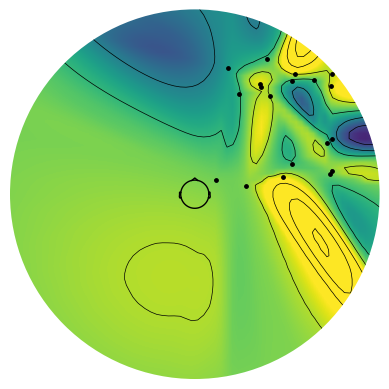

In [18]:
import mne
import matplotlib.pyplot as plt
import numpy as np

def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='viridis', cb_pos=None, cb_width=None, cb_height=None, marker='o', marker_style=None, **kwargs):
    marker_style = marker_style or {'markersize': 6, 'facecolors': 'black', 'edgecolors': 'black'}

    im, cm = mne.viz.plot_topomap(levels, pos=positions, axes=axes, names=ch_names, cmap=cmap, show=False, **kwargs)

    if cb_pos is not None and cb_width is not None and cb_height is not None:
        cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
        clb = plt.colorbar(im, cax=cbar_ax)
    else:
        clb = None

    if positions is not None:
        x, y = positions.T
        axes.scatter(x, y, marker=marker, s=marker_style['markersize'], c=marker_style['facecolors'], edgecolors=marker_style['edgecolors'])


    return im, cm, clb

test = main_mean.loc['Schizophrenia', 'delta']

channels = np.array(test.index.get_level_values('channel'))

positions = np.random.rand(len(channels), 2)

fig, ax = plt.subplots()
plot_eeg(test, positions, ax, fig, marker_style={'markersize': 6, 'facecolors': 'black', 'edgecolors': 'black'})
plt.show()


In [19]:
dss


,,delta,theta,alpha,beta,highbeta,gamma
specific.disorder,channel,,,,,,
Acute stress disorder,FP1,21.010092,21.449696,29.986463,14.860550,2.419641,2.379800
Adjustment disorder,FP1,22.409204,15.188234,27.723441,11.964587,2.481214,3.110645
Alcohol use disorder,FP1,19.031935,14.487469,31.710026,12.026554,2.016023,2.193860
Behavioral addiction disorder,FP1,18.631096,13.186498,16.906313,9.149485,2.067112,2.643175
Bipolar disorder,FP1,20.920267,12.899219,22.731308,13.258815,2.519366,3.336706
...,...,...,...,...,...,...,...
Obsessive compulsitve disorder,O2,11.490165,9.438324,31.925618,11.461414,2.151135,3.304698
Panic disorder,O2,13.623837,8.332327,20.802839,12.606385,2.855598,4.539175
Posttraumatic stress disorder,O2,13.845669,10.241304,28.496422,14.237963,2.411561,3.706658


In [20]:
df = main_mean

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

dss_reset = dss.reset_index()



In [22]:
dss_reset

,specific.disorder,channel,delta,theta,alpha,beta,highbeta,gamma
0,Acute stress disorder,FP1,21.010092,21.449696,29.986463,14.860550,2.419641,2.379800
1,Adjustment disorder,FP1,22.409204,15.188234,27.723441,11.964587,2.481214,3.110645
2,Alcohol use disorder,FP1,19.031935,14.487469,31.710026,12.026554,2.016023,2.193860
3,Behavioral addiction disorder,FP1,18.631096,13.186498,16.906313,9.149485,2.067112,2.643175
4,Bipolar disorder,FP1,20.920267,12.899219,22.731308,13.258815,2.519366,3.336706
...,...,...,...,...,...,...,...,...
223,Obsessive compulsitve disorder,O2,11.490165,9.438324,31.925618,11.461414,2.151135,3.304698
224,Panic disorder,O2,13.623837,8.332327,20.802839,12.606385,2.855598,4.539175
225,Posttraumatic stress disorder,O2,13.845669,10.241304,28.496422,14.237963,2.411561,3.706658
226,Schizophrenia,O2,14.780898,9.635807,28.995409,14.521340,2.627968,3.868594


In [23]:
le = LabelEncoder()
dss_reset['channel'] = le.fit_transform(dss_reset['channel'])  

dss_reset = dss_reset.set_index(['specific.disorder', 'channel'])


In [24]:
dss_reset = dss_reset.reset_index()


In [25]:
dss_reset

,specific.disorder,channel,delta,theta,alpha,beta,highbeta,gamma
0,Acute stress disorder,7,21.010092,21.449696,29.986463,14.860550,2.419641,2.379800
1,Adjustment disorder,7,22.409204,15.188234,27.723441,11.964587,2.481214,3.110645
2,Alcohol use disorder,7,19.031935,14.487469,31.710026,12.026554,2.016023,2.193860
3,Behavioral addiction disorder,7,18.631096,13.186498,16.906313,9.149485,2.067112,2.643175
4,Bipolar disorder,7,20.920267,12.899219,22.731308,13.258815,2.519366,3.336706
...,...,...,...,...,...,...,...,...
223,Obsessive compulsitve disorder,11,11.490165,9.438324,31.925618,11.461414,2.151135,3.304698
224,Panic disorder,11,13.623837,8.332327,20.802839,12.606385,2.855598,4.539175
225,Posttraumatic stress disorder,11,13.845669,10.241304,28.496422,14.237963,2.411561,3.706658
226,Schizophrenia,11,14.780898,9.635807,28.995409,14.521340,2.627968,3.868594


In [26]:
X = dss_reset.drop(['specific.disorder'], axis=1)
y = dss_reset['specific.disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.34782608695652173
Classification Report:
                                 precision    recall  f1-score   support

         Acute stress disorder       1.00      0.62      0.77         8
           Adjustment disorder       0.00      0.00      0.00         3
          Alcohol use disorder       0.25      1.00      0.40         1
 Behavioral addiction disorder       0.00      0.00      0.00         4
              Bipolar disorder       0.20      0.33      0.25         3
           Depressive disorder       0.25      0.17      0.20         6
               Healthy control       0.33      0.20      0.25         5
Obsessive compulsitve disorder       0.38      1.00      0.55         3
                Panic disorder       0.00      0.00      0.00         3
 Posttraumatic stress disorder       0.33      0.75      0.46         4
                 Schizophrenia       0.00      0.00      0.00         3
       Social anxiety disorder       0.33      0.33      0.33         3

        

C:\Users\DELL\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

dss_flat = dss.reset_index()

le = LabelEncoder()
dss_flat['channel'] = le.fit_transform(dss_flat['channel'])  

X = dss_flat.drop(['specific.disorder'], axis=1)
y = dss_flat['specific.disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.6304347826086957
SVM Classification Report:
                                 precision    recall  f1-score   support

         Acute stress disorder       1.00      0.88      0.93         8
           Adjustment disorder       0.00      0.00      0.00         3
          Alcohol use disorder       0.25      1.00      0.40         1
 Behavioral addiction disorder       1.00      0.50      0.67         4
              Bipolar disorder       0.60      1.00      0.75         3
           Depressive disorder       0.50      0.50      0.50         6
               Healthy control       0.67      0.80      0.73         5
Obsessive compulsitve disorder       0.67      0.67      0.67         3
                Panic disorder       0.50      0.67      0.57         3
 Posttraumatic stress disorder       0.67      0.50      0.57         4
                 Schizophrenia       0.50      0.67      0.57         3
       Social anxiety disorder       1.00      0.33      0.50         3

 

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

dss_flat = dss.reset_index()

le_disorder = LabelEncoder()
dss_flat['specific.disorder'] = le_disorder.fit_transform(dss_flat['specific.disorder'])  
le_channel = LabelEncoder()
dss_flat['channel'] = le_channel.fit_transform(dss_flat['channel']) 

X = dss_flat.drop(['specific.disorder'], axis=1)
y = dss_flat['specific.disorder']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.6956521739130435
MLP Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.00      0.00      0.00         3
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         3
           5       0.57      0.67      0.62         6
           6       0.67      0.80      0.73         5
           7       0.50      0.67      0.57         3
           8       0.67      0.67      0.67         3
           9       0.75      0.75      0.75         4
          10       0.67      0.67      0.67         3
          11       0.40      0.67      0.50         3

    accuracy                           0.70        46
   macro avg       0.69      0.69      0.67        46
weighted avg       0.71      0.70      0.69        46



C:\Users\DELL\anaconda3\envs\tf_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


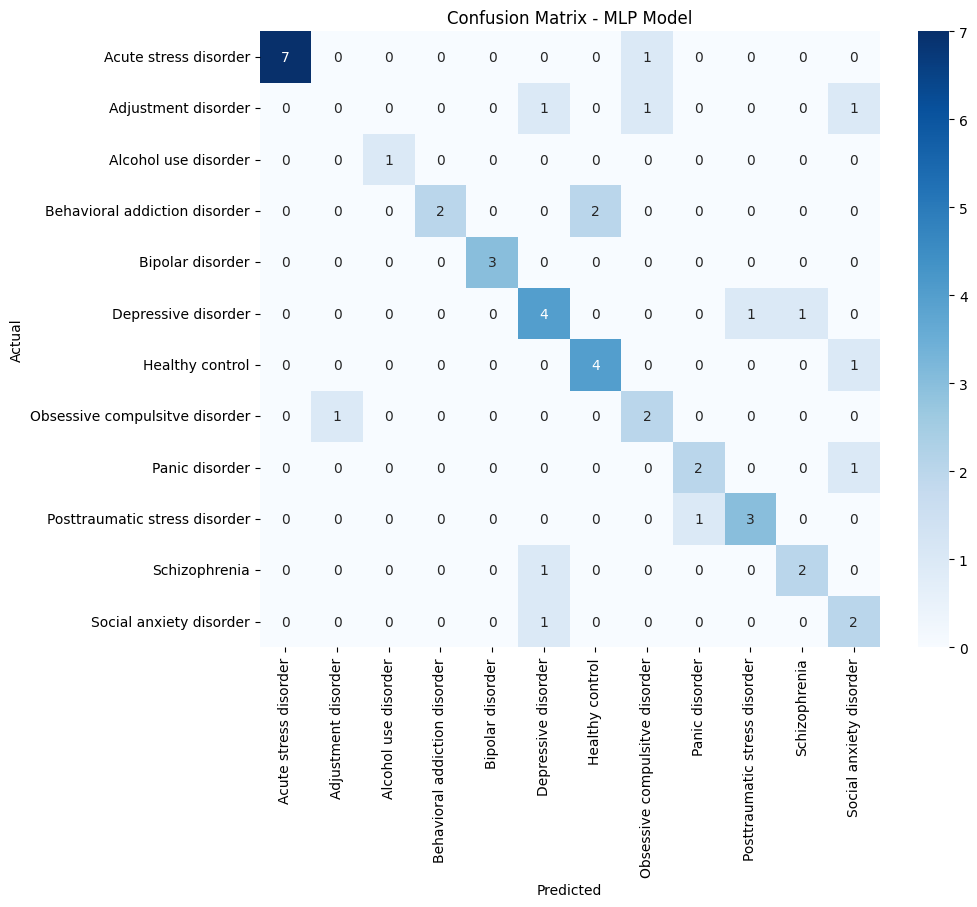

MLP Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.00      0.00      0.00         3
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         3
           5       0.57      0.67      0.62         6
           6       0.67      0.80      0.73         5
           7       0.50      0.67      0.57         3
           8       0.67      0.67      0.67         3
           9       0.75      0.75      0.75         4
          10       0.67      0.67      0.67         3
          11       0.40      0.67      0.50         3

    accuracy                           0.70        46
   macro avg       0.69      0.69      0.67        46
weighted avg       0.71      0.70      0.69        46

MLP Accuracy: 0.6956521739130435


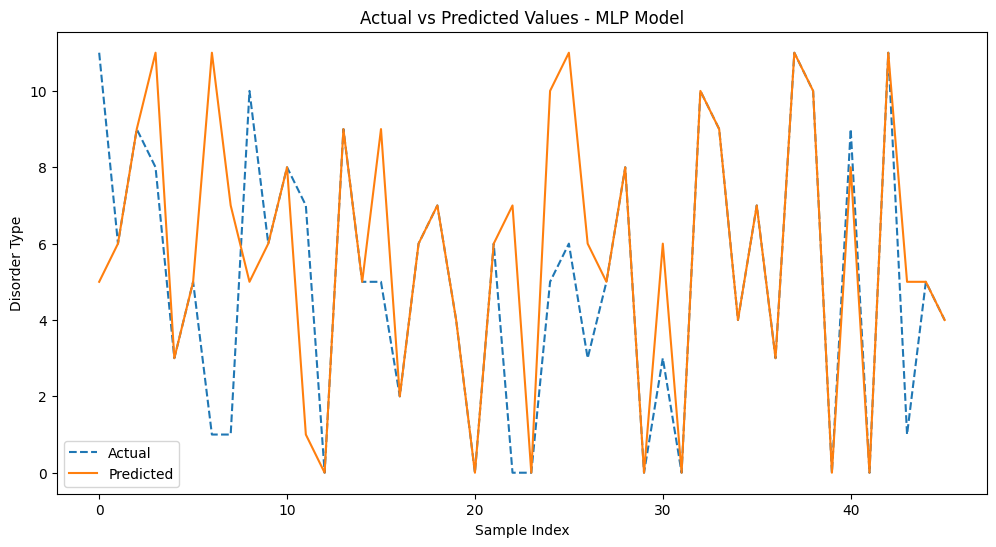

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=le_disorder.classes_, yticklabels=le_disorder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP Model')
plt.show()

print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

accuracy = accuracy_score(y_test, y_pred_mlp)
print("MLP Accuracy:", accuracy)

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', linestyle='dashed')
plt.plot(y_pred_mlp, label='Predicted', linestyle='solid')
plt.title('Actual vs Predicted Values - MLP Model')
plt.xlabel('Sample Index')
plt.ylabel('Disorder Type')
plt.legend()
plt.show()


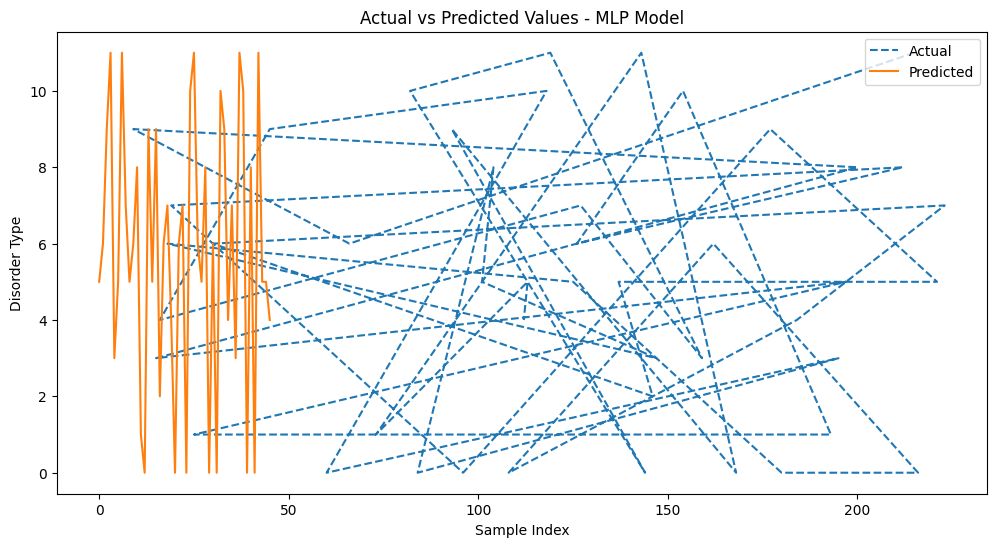

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linestyle='dashed')
plt.plot(y_pred_mlp, label='Predicted', linestyle='solid')
plt.title('Actual vs Predicted Values - MLP Model')
plt.xlabel('Sample Index')
plt.ylabel('Disorder Type')
plt.legend()
plt.show()


MLP Accuracy: 0.6956521739130435
MLP Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.00      0.00      0.00         3
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         3
           5       0.57      0.67      0.62         6
           6       0.67      0.80      0.73         5
           7       0.50      0.67      0.57         3
           8       0.67      0.67      0.67         3
           9       0.75      0.75      0.75         4
          10       0.67      0.67      0.67         3
          11       0.40      0.67      0.50         3

    accuracy                           0.70        46
   macro avg       0.69      0.69      0.67        46
weighted avg       0.71      0.70      0.69        46



C:\Users\DELL\anaconda3\envs\tf_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


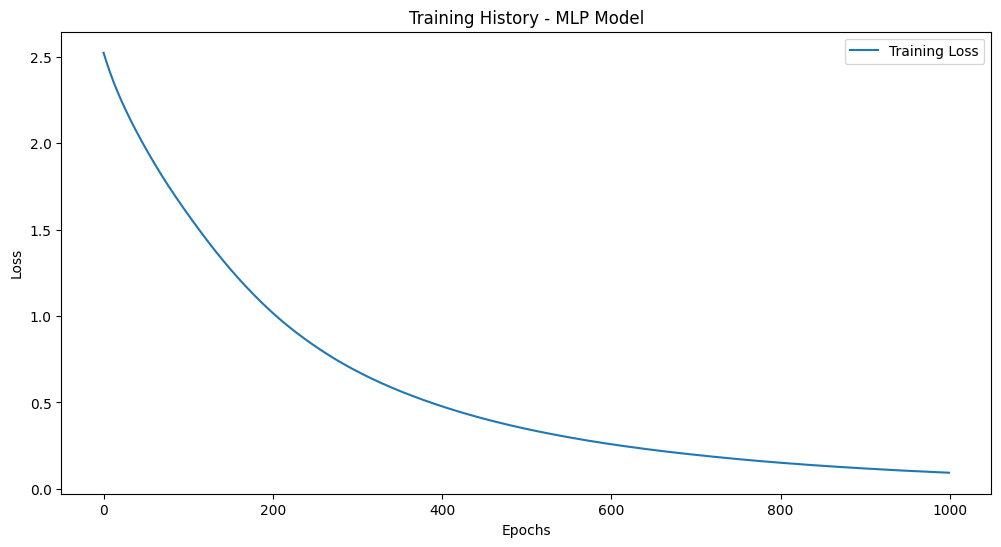

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

dss_flat = dss.reset_index()

le_disorder = LabelEncoder()
dss_flat['specific.disorder'] = le_disorder.fit_transform(dss_flat['specific.disorder'])  
le_channel = LabelEncoder()
dss_flat['channel'] = le_channel.fit_transform(dss_flat['channel'])  

X = dss_flat.drop(['specific.disorder'], axis=1)
y = dss_flat['specific.disorder']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

history = mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

plt.figure(figsize=(12, 6))
plt.plot(history.loss_curve_, label='Training Loss')
plt.title('Training History - MLP Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


C:\Users\DELL\anaconda3\envs\tf_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Accuracy: 0.6956521739130435
MLP Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.00      0.00      0.00         3
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         3
           5       0.57      0.67      0.62         6
           6       0.67      0.80      0.73         5
           7       0.50      0.67      0.57         3
           8       0.67      0.67      0.67         3
           9       0.75      0.75      0.75         4
          10       0.67      0.67      0.67         3
          11       0.40      0.67      0.50         3

    accuracy                           0.70        46
   macro avg       0.69      0.69      0.67        46
weighted avg       0.71      0.70      0.69        46



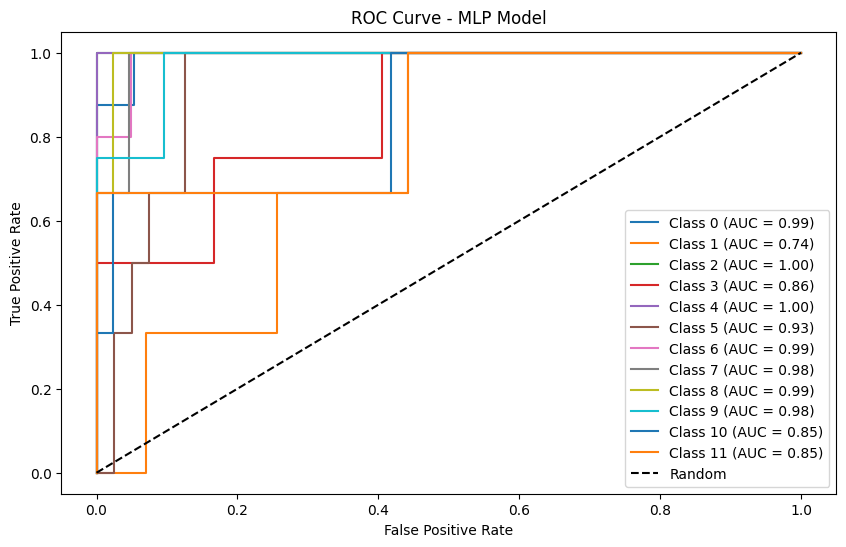

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

dss_flat = dss.reset_index()

le_disorder = LabelEncoder()
dss_flat['specific.disorder'] = le_disorder.fit_transform(dss_flat['specific.disorder'])  
le_channel = LabelEncoder()
dss_flat['channel'] = le_channel.fit_transform(dss_flat['channel'])  

X = dss_flat.drop(['specific.disorder'], axis=1)
y = dss_flat['specific.disorder']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

y_prob = mlp_model.predict_proba(X_test)

n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP Model')
plt.legend()
plt.show()


In [33]:
X_test

array([[ 0.18257419, -0.6660179 , -0.93446454,  1.00154989,  0.46558688,
        -0.54389087, -0.08666327],
       [-0.91287093,  0.28306624,  0.54564768, -0.06926356, -0.4993991 ,
         0.41586199, -0.07937354],
       [-0.36514837,  1.66371868,  0.76753974, -0.04092534,  0.55026593,
         1.13976887,  1.09500458],
       [ 1.64316767, -0.81026748, -1.07620573, -0.52553024, -0.31055716,
        -1.44737592, -1.24563994],
       [-0.18257419,  0.74709269,  0.31773636, -0.99704798, -1.08196496,
        -0.12790237, -0.03857217],
       [ 1.64316767, -0.82359322, -0.8652071 ,  0.07390017, -0.3533421 ,
        -0.82288553, -0.52421715],
       [-0.73029674,  0.90804598, -0.19001107, -0.5652417 , -0.79159316,
         0.30000175,  0.47070733],
       [ 1.64316767, -0.7566878 , -0.51405042,  1.46628709, -0.2106468 ,
        -1.1113851 , -0.64577021],
       [ 1.46059349, -1.16077318, -1.19812137, -1.09951862, -1.15070279,
        -1.26143217, -0.67241221],
       [-1.46059349, -0.2707

In [55]:
custom_input_scaled = [6, 1.08239692, 2.40995626, 1.70194018, 2.54830192, 0.88309089, 1.03565913]

custom_input_scaled_reshaped = [custom_input_scaled]

custom_prediction = mlp_model.predict(custom_input_scaled_reshaped)

print("Predicted Class:", custom_prediction[0])


Predicted Class: Posttraumatic stress disorder


In [53]:
dss_flat.to_csv('dss_flat.csv', index=False)


In [54]:
import joblib

joblib.dump(le_channel, 'le_channel.joblib')
joblib.dump(le_disorder, 'le_disorder.joblib')
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']